### Solitons in the Korteweg-de Vries equation
The Korteweg-de Vries equation
$$u_t + u u_x + u_{xxx}= 0$$
describes the propagation of uni-directional waves in shallow water under the influence of gravity and surface tension. This nonlinear PDE exhibits localized traveling waves of the form $u(x,t)=3c\,\mathrm{sech}(\sqrt{c}(x-ct)/2)^2$ for all $c>0$. Here is a sketch of these solutions:

![Soliton](data:image/svg+xml,%3Csvg%20version%3D%221.1%22%20viewBox%3D%2271%2C197%2C219%2C57%22%20width%3D%22219%22%20height%3D%2257%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%3E%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23666%22%20stroke-width%3D%223%22%20stroke-linecap%3D%22round%22%20d%3D%22M72.75%2C252.25%20C188.5%2C251.75%2C161.498%2C201%2C180%2C201%20C199.25%2C201%2C169%2C251.5%2C287.5%2C252.25%22%2F%3E%3Cg%3E%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23666766%22%20stroke-width%3D%221.75%22%20d%3D%22M201.75%2C215.75%20L237.766%2C215.963%22%2F%3E%3Cpath%20fill%3D%22%23666766%22%20d%3D%22M232.16%2C209.992%20L244%2C216%20L232.09%2C221.867%20L237.469%2C215.961%22%2F%3E%3C%2Fg%3E%3Ctext%20fill%3D%22%23666%22%20font-family%3D%22Helvetica%22%20font-size%3D%2218%22%20transform%3D%22matrix%281%2C0%2C0%2C1%2C215.5%2C211.957%29%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%3Ec%3C%2Ftspan%3E%3C%2Ftext%3E%3C%2Fsvg%3E)

These waves are often referred to as solitons, and they have the amazing property that they pass through each unchanged if they travel with different velocities. Watch the experiment below for a soliton-like wave in a shallow channel!

In [1]:
import IPython
IPython.display.IFrame(src="https://www.youtube.com/embed/w-oDnvbV8mY",width="560", height="315")

We will now solve the Korteweg-de Vries equation numerically. First, we import the necessary Python modules.

In [2]:
%matplotlib widget
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

Next, we define the profile of the soliton with speed $c$. To solve the KdV equation numerically, we use Fourier transform in space and a leapfrog method in time.

In [3]:
def soliton(x, c, center):
    dx = x[1]-x[0]
    L = x[-1] + dx
    u = 3*c/np.cosh(np.sqrt(c)/2*(np.mod(x,L) - L/2))**2
    return np.roll(u, int((center-L/2)/dx))

def advance_step(u0, dt, k, k3):
    uh = fft.fft(u0)
    u1 = np.real(fft.ifft(1j*k*uh))
    u3 = np.real(fft.ifft(-1j*k3*uh)) 
    return dt*u0*u1 + u3

def update_solution(u0, U, L, dt, N, Nframes, Nskip):
    n = 0
    k = 2*np.pi*N/L*fft.fftfreq(N)
    k3 = np.sin(k**3*dt)
    um = u0 - advance_step(u0, dt, k, k3)
    while n<Nframes:
        U[n,:] = u0
        yield u0
        n += 1
        for nn in range(Nskip):
            up = um - 2*advance_step(u0, dt, k, k3)
            um = u0
            u0 = up

def update_graph(u, x, line1):
    line1.set_data(x, u)

We define numerical parameter, set the initial condition, and compute and animate the solution. Our initial condition is the linear superposition of two solitons with different speeds and amplitudes. The horizontal lines shown in light grey indicate the amplitude of each soliton. Since the Korteweg--de Vries equation is nonlinear, we should not expect that the two solitons pass through each other!

<IPython.core.display.Javascript object>


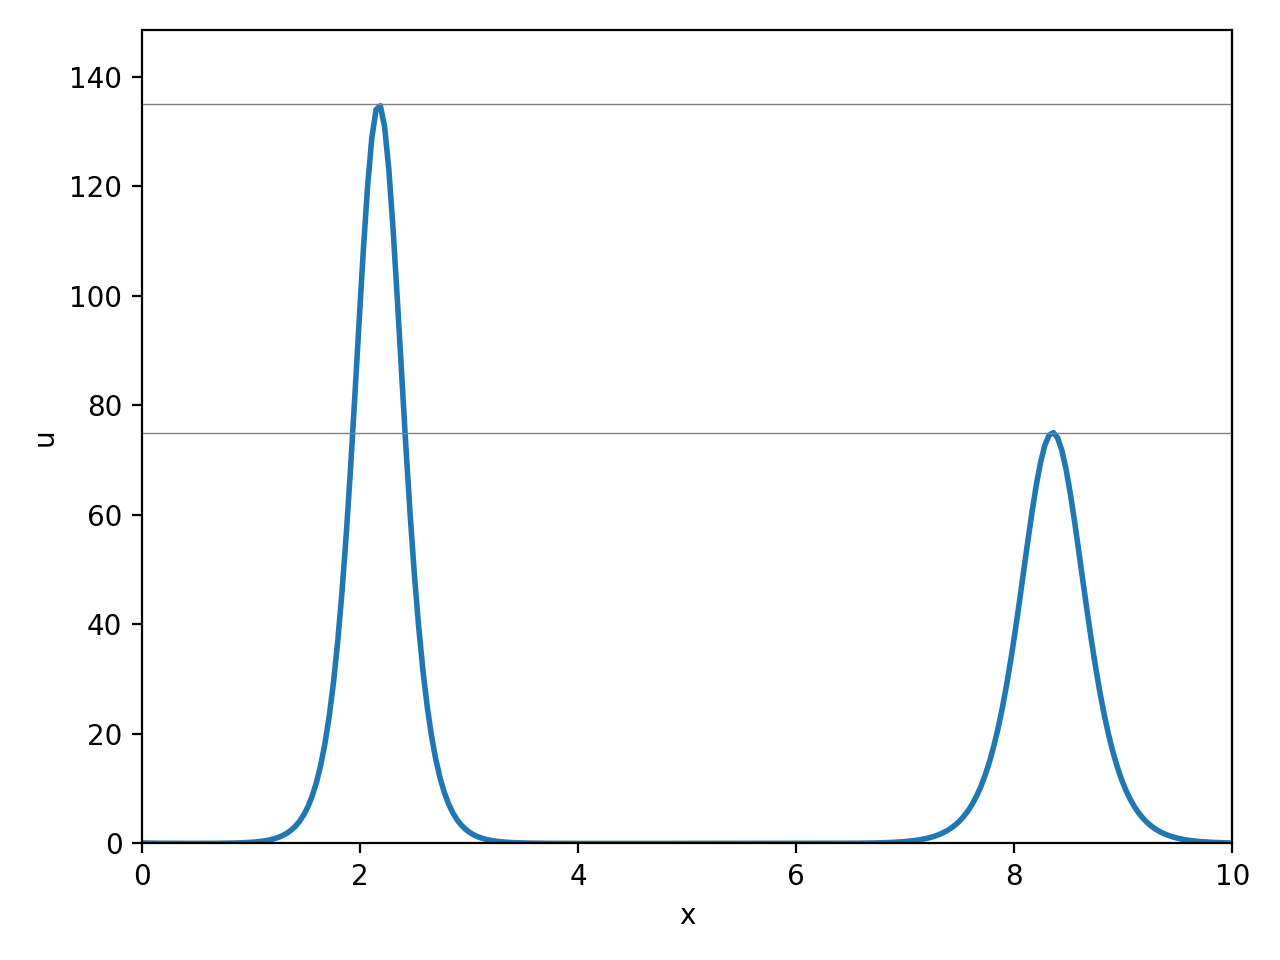

In [4]:
# numerical parameters
N = 256       # number of Fourier modes
L = 10        # spatial interval
T = 0.45       # length of time domain

# initial condition
c1 = 45
c2 = 25
x = np.linspace(0, L, N, endpoint=False)
u0 = soliton(x, c1, 1.5) + soliton(x, c2, 8)

# set time step
dx = L/N
dt = dx**3/(2*np.pi**2)

# compute and animate solution
Nsteps = int(T/dt)
Nskip = 750
Nframes = int(Nsteps/Nskip)
U = np.zeros((Nframes, N))

fig = plt.figure()
ax  = plt.axes(xlim=(0,L), ylim=(0, np.amax(u0)*1.1))
line1, = ax.plot([], [], linewidth=2, color = "tab:blue")
line2 = ax.axhline(y=3*c1, c='grey', linewidth=0.5)
line3 = ax.axhline(y=3*c2, c='grey', linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('u')
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(u0, U, L, dt, N, Nframes, Nskip),
                              fargs=(x, line1), interval=5, save_count=Nframes, repeat=False)
plt.tight_layout()
plt.show()

Finally, we illustrate the dynamics using a space-time contour plot.

<IPython.core.display.Javascript object>


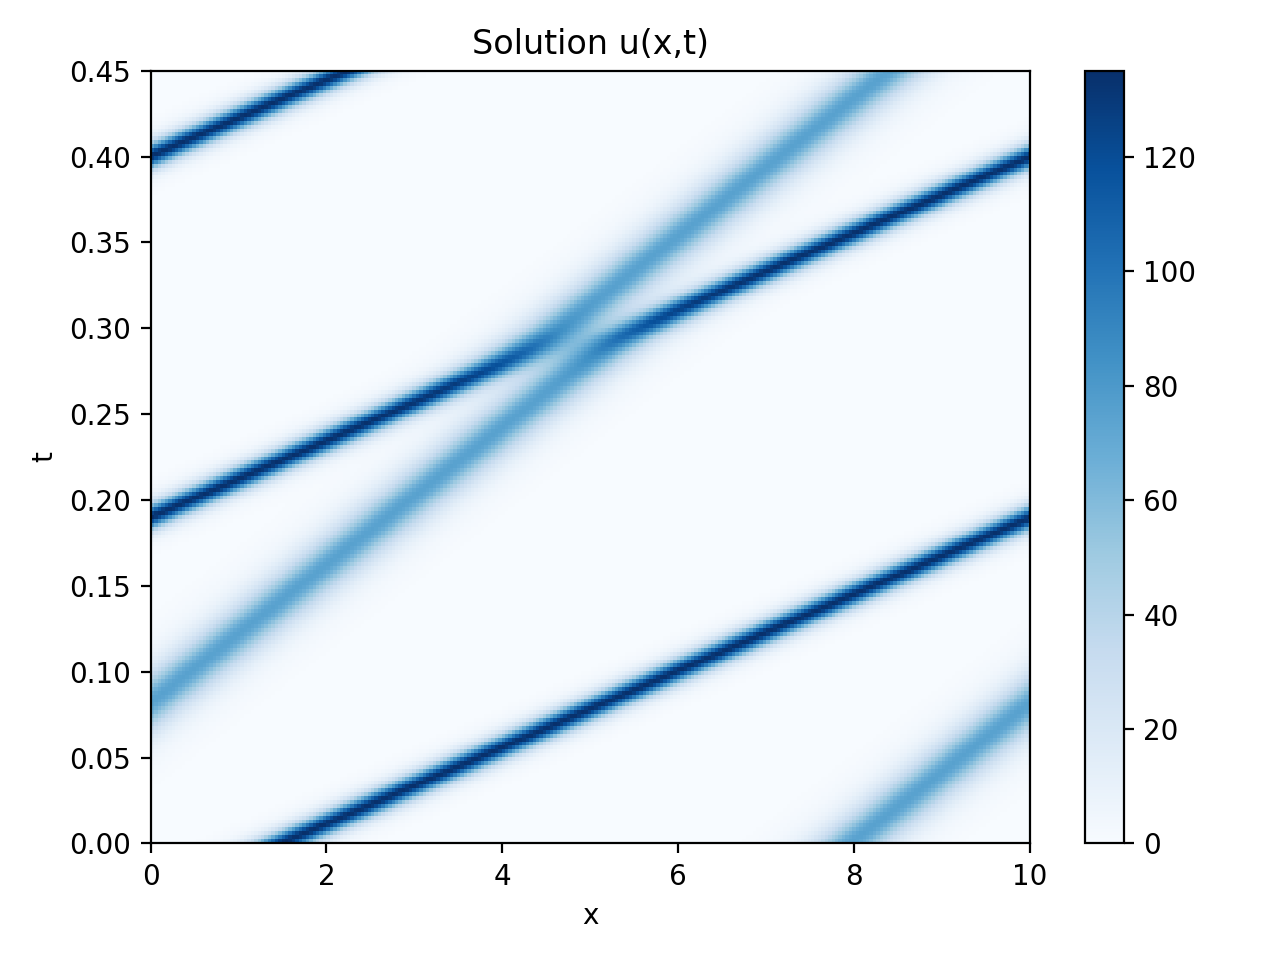

In [5]:
fig = plt.figure()
extent = [0, L, 0, T]
plt.imshow(U, cmap='Blues', extent=extent, aspect='auto', origin='lower')
plt.title('Solution u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.tight_layout()
plt.show()